# Ground State Zinc Oxide

In [10]:
# Give some estimate for MT radii, maintaining a consistent ratio between Zn and O
from src.materials import ZnOWurzite
from src.optimal_muffin_tins import main

assert ZnOWurzite.unit == 'angstrom'
main(ZnOWurzite, scaling_factor=0.9)
print(f"All bond and MT suggestions in {ZnOWurzite.unit}")

Minimum bond length between atomic numbers (8, 8): 3.2077121269530924
Minimum bond length between atomic numbers (8, 30): 1.9738161289053884
For each bond, compute the MT radius associated with the element with the smallest MT radius. 
Do this for each bond, and choose the minimum.
[1.6039, 0.8868]
Smallest muffin tin radius for element 8 is 0.79812, scaled by 0.9
Use this to determine the MT radii for all other elements in the system, with optimal ratio 
determined by tabulated rkgmax ratios
Atomic Number 8, MT radius 0.79812, sum of MT radii 1.59624, min_bond_length 3.2077121269530924
Atomic Number 30, MT radius 0.9783467781935792, sum of MT radii 1.7764667781935792, min_bond_length 1.9738161289053884
All bond and MT suggestions in angstrom


#### MT Selection Summary

Converting the minimum bond length to Bohr, between atomic numbers (8, 30): 3.357

Smallest muffin tin radius in the system is for element 8: 0.79812 (angstrom, scaling factor = 0.9)
Atomic Number 30, MT radius 0.9783467781935792 (angstrom scaling factor = 0.9)

So in Bohr, try MT_O = 1.50 and MT_Zn = 1.85

Dima's paper. DOI: 10.1103/PhysRevB.94.035118
His MTs are: 1.6 Bohr for O and Zn, which seems a little small for Zn.
In the case of binary materials, we use equal RMT for both species.

In [9]:
# Look at difference between constructing the lattice with ASE, from lattice constants, and using PyMatGen
import os
import ase
import numpy as np
# Plot structure I imported with pymatgen structure
# https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html
from ase.visualize import view

# In angstrom
# This looks right
lattice_returned_by_pymatgen = np.array([[-1.624700, -2.814063, 0.000000], [-1.624700, 2.814063, 0.000000], [0.000000, 0.000000, -5.203800]])

# Straight from the cif - angstrom and degrees
cell = ase.geometry.cell.Cell.fromcellpar([3.249400, 3.249400, 5.203800, 90, 90, 120])

# http://aflowlib.org/prototype-encyclopedia/trigonal_lattice.html#lattice10
print(cell.get_bravais_lattice())
print(vars(cell))

# In angstrom ... this really doesn't look right, despite ASE saying it's a hexagonal lattice
lattice_returned_by_ase = np.array([[3.2494,  0.,  0.], [-1.6247,  2.81406295,  0. ], [0.,  0.,  5.2038]])

# Because the latice vectors constructed with ASE (above) do not look right, go with PyMatGen
# Directory: zno
#  pymatgen lattice vectors and positions
# Written out to my_ZnO.cif - they look consistent.

# Output pymatgen structure out as cif
assert ZnOWurzite.unit == 'angstrom', "ASE needs lattice in angstrom"
zno =  ase.Atoms(symbols=ZnOWurzite.elements, scaled_positions=ZnOWurzite.fractional_positions, cell=ZnOWurzite.lattice, pbc=True)
print(os.getcwd())
ase.io.write('my_ZnO.cif', zno)

# Note, this is commented out because the cif visualisation with Vesta is much better.
# Would prefer this, but it's not supported by pycharm view(atoms, viewer='ngl')
# view(zno, viewer='x3d')

HEX(a=3.2494, c=5.2038)
{'array': array([[ 3.2494    ,  0.        ,  0.        ],
       [-1.6247    ,  2.81406295,  0.        ],
       [ 0.        ,  0.        ,  5.2038    ]])}
/Users/alexanderbuccheri/Python/pycharm_projects/wp_benchmarks/groundstate/ZnO


## Shifted Atomic Positions

Note, exciting will shift the atomic positions automatically for symmetry purposes:

```
<input>
  <title>ZnO-PBEsol</title>
  <structure speciespath=".">
    <crystal>
      <basevect>  -3.070237814      -5.317807985       0.000000000</basevect>
      <basevect>  -3.070237814       5.317807985       0.000000000</basevect>
      <basevect>   0.000000000       0.000000000      -9.833756099</basevect>
    </crystal>
    <species speciesfile="Zn.xml" rmt="1.8500">
      <atom coord="0.0000000000      0.0000000000      0.0000000000"/>
      <atom coord="0.6666666660      0.3333333340      0.5000000000"/>
    </species>
    <species speciesfile="O.xml" rmt="1.5000">
      <atom coord="0.0000000000      0.0000000000      0.6179000000"/>
      <atom coord="0.6666666660      0.3333333340      0.1179000000"/>
    </species>
  </structure>
</input>
```

So one must use the output of geometry.xml to select the two atomic points.
Choose bond length as:
```
    <path steps="100">
               <point coord="0.6666666660      0.3333333340      0.1179000000"/>
               <point coord="0.6666666660      0.3333333340      0.5000000000"/>
    </path>
```

Radial position where the charge density is a minimum: 1.935670591 bohr


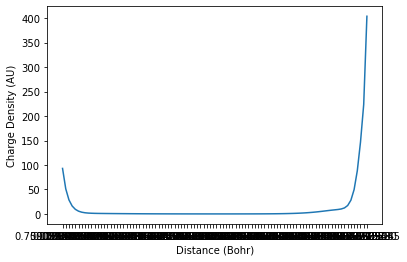

In [2]:
### Point at Which 1D Charge Density is a Minimum
import numpy as np
import matplotlib.pyplot as plt
from excitingtools.exciting_dict_parsers.properties_parser import parse_charge_density

x, y = parse_charge_density('RHO1D.xml')
index = np.argmin(y)

print(f"Radial position where the charge density is a minimum: {x[index]} bohr")

plt.xlabel("Distance (Bohr)")
plt.ylabel("Charge Density (AU)")
# Ignore close to the atoms as the density is so large
plt.plot(x[2:-2], y[2:-2])
plt.show()

The bond length between Zn and O is 3.357
MT radii of MT_O = 1.50 and MT_Zn = 1.85 lead to a charge density is a minimum at 1.935670591 bohr

TODO(Alex) I am not sure how the density minimum corresponds to the MT radii.
My assumption is that one wants it as close to the max MT radius as possible, but I am not sure.

In [11]:
from src.optimal_muffin_tins import fixed_precision_rgkmax

notes = """
"Set Zn's MT to 1.90, and use this to pin all others in the system (oxygen), with optimal ratio determined by tabulated rkgmax ratios.

mt_y / mt_min = fixed_precision_rgkmax(an_y) / fixed_precision_rgkmax(an_min)
    such that
mt_min = (fixed_precision_rgkmax(an_min) /  mt_min = fixed_precision_rgkmax(an_y)) * mt_y
"""

# Some value < charge minimum
mt_zn = 1.90
mt_min = (fixed_precision_rgkmax(8) /  fixed_precision_rgkmax(30)) * mt_zn
# MT of oxygen = 1.55
print(f"MT of oxygen = {mt_min}")

MT of oxygen = 1.5499902834043513


Note: rgkmax = 7, gmaxvr=21, and k-points = 4,4,4 (I believe)

With
mt_zn = 1.85 and mt_o = 1.50

+ SCF iteration number :   27                                                  +
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 Total energy                               :     -3757.19984085
 _______________________________________________________________
 Fermi energy                               :         0.16565362
 Kinetic energy                             :      3822.03665017
 Coulomb energy                             :     -7421.09409898
 Exchange energy                            :      -154.16620862
 Correlation energy                         :        -3.97618342

 DOS at Fermi energy (states/Ha/cell)       :       732.64540018

 core leakage                           :         0.00470042


With
mt_zn = 1.90 and mt_o = 1.55
Note, exciting reports 3.729971636 as the Zn-O bond length, so clearly the above is viable.

Notes
* SCF took 29 iterations but the total energy looks slightly better
* Change in the muffin tins will cause some change in the linearisation energies, so one will want to perform the search again.
* Charge minimum stayed in the same place: 1.935670591 Bohr
* Core leakage is lower, but still high => choice of basis functions?

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+ SCF iteration number :   29                                                  +
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 Total energy                               :     -3757.20037083
 _______________________________________________________________
 Fermi energy                               :         0.15934491
 Kinetic energy                             :      3822.03753213
 Coulomb energy                             :     -7421.09524700
 Exchange energy                            :      -154.16655743
 Correlation energy                         :        -3.97609853

 DOS at Fermi energy (states/Ha/cell)       :       731.09923590

 Electron charges :
     core                                   :        28.00000000
     core leakage                           :         0.00354515
     valence                                :        48.00000000
     interstitial                           :         6.03072946
     charge in muffin-tin spheres :
                  atom     1    Zn          :        28.10634304
                  atom     2    Zn          :        28.10634304
                  atom     3     O          :         6.87829223
                  atom     4     O          :         6.87829223
     total charge in muffin-tins            :        69.96927054
     total charge                           :        76.00000000


Adding an extra l-channel (l=6) reduces the total energy by ~ 1 meV


# Assuming this basis is ok
# Input comes:
```
<?xml version="1.0" encoding="utf-8"?>
<input>

   <title>ZnO-PBEsol</title>

   <structure speciespath=".">
      <crystal  scale="1.8897259886">
         <basevect>-1.624700  -2.814063   0.000000</basevect>
         <basevect>-1.624700   2.814063   0.000000</basevect>
         <basevect> 0.000000   0.000000  -5.203800</basevect>
      </crystal>

      <species speciesfile="Zn.xml" rmt="1.90">
        <atom coord="0.666666667  0.333333333  0.000000000"></atom>
	<atom coord="0.333333333  0.666666667  0.500000000"></atom>
      </species>

      <species speciesfile="O.xml" rmt="1.55">
	<atom coord="0.666666667  0.333333333  0.617900000"></atom>
        <atom coord="0.333333333  0.666666667  0.117900000"></atom>
      </species>
   </structure>

   <groundstate
      do="fromscratch"
      rgkmax="6.0"
      ngridk="8 8 5"
      xctype="GGA_PBE_SOL"
      epsengy="1.e-6"
      gmaxvr="18.0"
      >
   </groundstate>

</input>
```


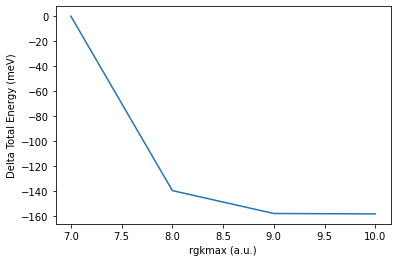

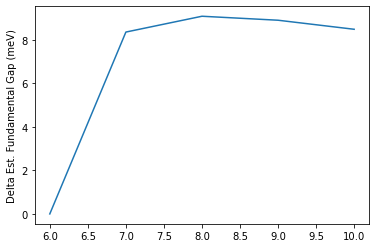

In [4]:
# Converge rgkmax
import matplotlib.pyplot as plt

gmaxvr = [18, 21, 24, 27, 27]
rgkmax = [6, 7, 8, 9, 10]

total_energy = [-3739.50730056, -3739.53847191, -3739.54360625, -3739.54428096, -3739.54429318]
est_fundamental_gap = [0.02527314, 0.02558060, 0.02560734, 0.02560060, 0.02558531]

ha_to_ev = 27.2114
ha_to_mev = ha_to_ev * 1000.

plt.rcParams['axes.formatter.useoffset'] = False
plt.xlabel("rgkmax (a.u.)")
plt.ylabel("Delta Total Energy (meV)")
plt.plot(rgkmax[1:], [ (x-total_energy[1]) * ha_to_mev for x in total_energy[1:]])
plt.show()

plt.ylabel("Delta Est. Fundamental Gap (meV)")
plt.plot(rgkmax, [(x-est_fundamental_gap[0]) * ha_to_mev for x in est_fundamental_gap])
plt.show()

In [ ]:
# Effect of LO recommendations on High Energy LOs

# For rgkmax = 7 and gmaxvr = 20
# Using l=2 onwards search = false with trial energies = 0 (l=2) and 1 Ha (l>2)
energy =  -3739.53847199
gap =  0.02558062

# Using l=2 onwards search = true with trial energies = 0 (l=2) and 1 Ha (l>2)
energy = -3739.53847194
gap = 0.02558045

# Using l=2 onwards trial energies from LO recommendations, search = true
# My guess is they have a negligible effect for ground state
energy = -3739.53847194
gap = 0.02558043

message = """
Effect of the choice of trial energy for energies >= 0 Ha, for a ground state calculation
has a negligible effect on the total energy and the est. fundamental gap.

The choice of trial energies for LOs with energies < 0 Ha is likely to have an effect on
ground state calculations, however I *think* it's fine to fix them for convergence
calculations, then recompute the LO recommendations once one has settled on an rgkmax
from which to do the GW calculations with.
"""

print(message)

In [1]:
""" Band structure
LO trial energies for l=0 and 1 fixed at some LO recommendations (from unknown rgkmax)
LO trial energies for l=2 set to 0.01 Ha, and l>2 set yo 1.00 Ha (search true)
rgkmax="8.0", ngridk="8 8 5", gmaxvr="24.0"
"""

# Band structure path
from src.parsers import get_standardised_band_path, exciting_band_path_xml
from src.materials import ZnOWurzite

assert ZnOWurzite.unit == 'angstrom'
lattice = ZnOWurzite.lattice

symbolic_path, high_symmetry_points = get_standardised_band_path(lattice)
band_str = exciting_band_path_xml(symbolic_path, high_symmetry_points)

print(symbolic_path)
print(band_str)

GMKGALHA,LM,KH
<bandstructure>
    <plot1d>
      <path steps="100">
        <point coord="0.0 0.0 0.0" label="G" />
        <point coord="0.5 0.0 0.0" label="M" />
        <point coord="0.3333333333333333 0.3333333333333333 0.0" label="K" />
        <point coord="0.0 0.0 0.0" label="G" />
        <point coord="0.0 0.0 0.5" label="A" />
        <point coord="0.5 0.0 0.5" label="L" />
        <point coord="0.3333333333333333 0.3333333333333333 0.5" label="H" />
        <point coord="0.0 0.0 0.5" label="A" breakafter="true"/>
        <point coord="0.5 0.0 0.5" label="L" />
        <point coord="0.5 0.0 0.0" label="M" breakafter="true"/>
        <point coord="0.3333333333333333 0.3333333333333333 0.0" label="K" />
        <point coord="0.3333333333333333 0.3333333333333333 0.5" label="H" />
     </path>
   </plot1d>
</bandstructure>
    
